In [1]:
 # 1. Implement Hierarchical Clustering using scikit library in Python.
#         i) Apply various Linkages (single, complete, average, centroid) which give the better score.
#         ii) Visualize the highest scoring clustering result with dendrogram using scipy library.
        
# 2. Use the same Iris dataset and perform K-means Clustering from Scratch (without using sklearn Library)

# 3. Perform neural network based learning on the dataset below to predict whether a given SMS message is spam or not.
#         3.1 Text - Preprocessing
#                 i) Clean the ‘SMS message’ text attribute using NLP pre-processing. 
#                 ii) Vectorize the SMS message text data using two approaches: BoW and TF-IDF. 

#         3.2 Perform dimensionality reduction (PCA). BoW and TF-IDF vectors are of large size. Reduce them into 
#             vectors of length L using PCA. You can try experiments with L = 100, 200, 500.
            
#         3.3 Model Construction : Build your own custom Neural Network (NN) (decide yourself number of layers, 
#             number of neurons in each layer, etc). Split the dataset into 80% train and 20% test. Use 20% of
#             training data as validation.
#                 i) Measure training and validation accuracy v/s loss. Plot learning curves.
#                 ii) Perform hyperparameter tuning (experiment with different number of hidden layers, 
#                                                    number of neurons in each layer, etc)
#                 iii) Build the NN model to predict the Spam/Ham

#         3.4. Run Neural Networks for different epochs values, say (10, 20, 30 ,40, 50). 
#              For each epoch value, compute accuracy and loss. Use matplotlib to draw line plot 
#              (in double line  plot) for accuracy percentages and loss percentages for each configuration.

In [2]:
# 1. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

import nltk
import re
from nltk.corpus import stopwords

In [3]:
iris = pd.read_csv('Iris.csv')
iris_df = pd.DataFrame(iris)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [4]:
# Scaled to normalize the data such that variance ~ 1
iris_scaled = whiten(iris_df)
pd.DataFrame(iris_scaled).describe()

,0,1,2,3,4
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,7.080243,7.067047,2.137392,1.575923,2.449490
std,1.003350,1.003350,1.003350,1.003350,1.003350
min,5.210218,4.628059,0.568657,0.131473,1.224745
25%,6.179561,6.479283,0.909851,0.394419,1.224745
50%,7.027736,6.942089,2.473658,1.709149,2.449490
75%,7.754744,7.636298,2.900151,2.366513,3.674235
max,9.572262,10.181730,3.923734,3.286824,3.674235


In [5]:
methods = ['complete', 'average', 'centroid', 'weighted', 'ward']
accuracy = []

for method in methods : 
    distance = linkage(iris_scaled, method = method, metric = 'euclidean')
    iris_df['labels'] = fcluster(distance, 3, criterion = 'maxclust')
    accuracy.append(accuracy_score(iris_df['Species'], iris_df['labels']))

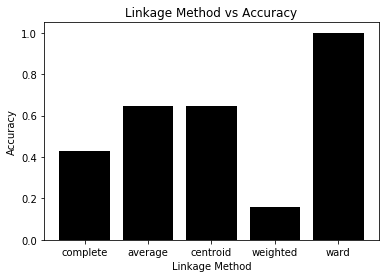

In [6]:
plt.bar(methods, accuracy, color = 'black')
plt.xlabel('Linkage Method')
plt.ylabel('Accuracy')
plt.title('Linkage Method vs Accuracy')
plt.show()

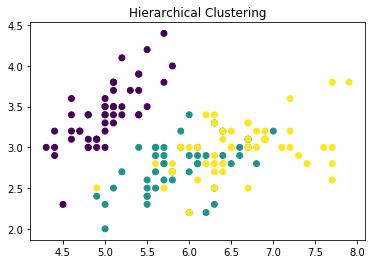

In [7]:
# Plot the clusters : 

plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], c = iris_df['labels'])
plt.title('Hierarchical Clustering')
plt.show()

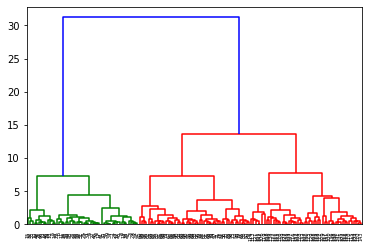

In [8]:
# Creating dendogram to find optimal number of clusters : 
dn = dendrogram(distance)
plt.show()
# The dendrogram so formed shows that 3 clusters are optimal for the given dataset

-----------------------------------------------------------------------------------------------------------------

In [9]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
x = pd.DataFrame(iris.data,columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target,columns=['Classes'])

In [11]:
x['species'] = pd.Series(np.random.randn(150), index = x.index)
x['species'][y['Classes']==0]='Setosa'
x['species'][y['Classes']==1]='versicolor'
x['species'][y['Classes']==2]='virginica'

/Users/ramyaneelakantan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ramyaneelakantan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
clusters = len(np.unique(y))

In [13]:
def euclidean_dis(x1, x2) : 
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [16]:
from collections import defaultdict

class KMeans:
    
    def __init__(self, data, k, max_iter):
        self.data = data
        self.k = k
        self.max_iter = max_iter
        
    def predict(self):
        centroids = defaultdict(int)
        k = self.k
        max_iter = self.max_iter
        
        for i in range(k):
            centroids[i] = self.data[i]
        
        r = 0

        for i in range(max_iter):
            r += 1
            classes = defaultdict(list)
            
            for key in range(k):
                classes[key] = []
            for datapoint in self.data:
                distance = []
                for j in range(k):
                    dist = euclidean_dis(datapoint, centroids[j])
                    distance.append(dist)
                mindis = min(distance)

                index = distance.index(mindis)
                classes[index].append(datapoint)
                old_centroid = dict(centroids)

            for t in range(k):
                class_ = classes[t]
                new_centroid = np.mean(class_, axis=0)
                centroids[t] = new_centroid
            
            flag=1 
            
            for t in range(k):
                a = centroids[t]
                b = old_centroid[t]
                if np.sum((a - b) / b * 100) > 0.001:
                    flag = 0

            if flag==1:
                break

        return classes,centroids

In [17]:
kmeans = KMeans(iris.data[:,:4], clusters, 10000)

classes,centroids = kmeans.predict()

for i in range(0,3):
    classes[i] = np.array(classes[i]).tolist()
    
for i in range(0,3):
    print(len(classes[i]))
print(centroids)


39
61
50
defaultdict(<class 'int'>, {0: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), 1: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), 2: array([5.006, 3.428, 1.462, 0.246])})


In [20]:
setosa = []
versicolor = []
virginica = []

for i in range(len(iris.target)) :
    if iris.target[i] == 0 :
        setosa.append(iris.data[i])
    elif iris.target[i] == 1 :
        versicolor.append(iris.data[i])
    elif iris.target[i] == 2 :
        virginica.append(iris.data[i])


setosa = np.array(setosa).tolist()
versicolor = np.array(versicolor).tolist()
virginica = np.array(virginica).tolist()

def subset(array1,array2) :
    flag = 0
    for i in range(len(array1)) :
        if(array2 == array1[i]) :
            flag = 1
            break
    if(flag == 1) :
        return True
    else :
        return False
    
def confusion_matrix(a, b, c, classes) :
    
    conf_matrix = [[0 for i in range(y.Classes.nunique())] for i in range(y.Classes.nunique())]

    for element in a :
        if subset(classes[2], element) :
            conf_matrix[0][0] = conf_matrix[0][0] + 1
        elif subset(classes[1], element) :
            conf_matrix[0][1] = conf_matrix[0][1] + 1
        elif subset(classes[0], element) :
            conf_matrix[0][2] = conf_matrix[0][2] + 1

    for element in b:
        if subset(classes[2], element) :
            conf_matrix[1][0] = conf_matrix[1][0] + 1
        elif subset(classes[1], element) :
            conf_matrix[1][1] = conf_matrix[1][1] + 1
        elif subset(classes[0], element) :
            conf_matrix[1][2] = conf_matrix[1][2] + 1

    for element in c:
        if subset(classes[2], element) :
            conf_matrix[2][0] = conf_matrix[2][0] + 1
        elif subset(classes[1], element) : 
            conf_matrix[2][1] = conf_matrix[2][1] + 1
        elif subset(classes[0], element) :
            conf_matrix[2][2] = conf_matrix[2][2] + 1
            
    return conf_matrix


class Metrics:
    
    def __init__(self, confusion_m) :
        self.confusion_m = confusion_m
        self.total = np.sum(confusion_m)
        self.diagonal = np.sum(np.diag(confusion_m))
    
    def accuracy(self) :
        accuracy = (self.diagonal / self.total)
        return accuracy
    
    def recall(self) :
        recall = np.diag(self.confusion_m) / np.sum(self.confusion_m, axis = 1)
        recall = np.mean(recall)
        return recall
    
    def precision(self) :
        precision = np.diag(self.confusion_m) / np.sum(self.confusion_m, axis = 0)
        precision = np.mean(precision)
        return precision
    
    def f1_score(self,precision,recall):
        f1_score = (2 * precision * recall) / (precision + recall)
        return f1_score

In [21]:
matrix = confusion_matrix(setosa, versicolor, virginica, classes)
performance = Metrics(matrix)
accuracy = performance.accuracy()
recall = performance.recall()
precision = performance.precision()
f1_score = performance.f1_score(precision,recall)

print('Confusion Matrix :')
print(np.array(matrix))

print("Accuracy :  {}".format(accuracy * 100))
print("Recall : {}".format(recall * 100))
print("Precision : {}".format(precision * 100))
print("F1-Score : {}".format(f1_score * 100))

Confusion Matrix :
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
Accuracy :  88.66666666666667
Recall : 88.66666666666667
Precision : 89.78562421185372
F1-Score : 89.22263731397425


-----------------------------------------------------------------------------------------------------------------

In [93]:
# 3. 
pd.set_option('display.max_colwidth', 100)
messages = pd.DataFrame(pd.read_csv('spam.csv'))
messages.head()

,Spam,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [94]:
# Check null values
messages.isnull().sum()

Spam       0
Message    0
dtype: int64

In [95]:
Stopwords = set(stopwords.words('english'))

def clean_text(text) : 
    text = text.lower()
    text = re.sub(r'[^0-9a-z-A-Z]', ' ', text) # Remove special characters from the text
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces from the text
    text = ' '.join(word for word in text.split() if word not in Stopwords) # Remove stopwords from the text
    return text

In [96]:
messages['Clean'] = messages['Message'].apply(clean_text)
messages.head()

,Spam,Message,Clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah think goes usf lives around though


In [97]:
messages['type'] = messages['Spam'].map({'ham' : 0, 'spam' : 1})
messages['Spam'] = messages['type']
messages.drop(['Spam'], axis = 1, inplace = True)
messages.head()

,Message,Clean,type
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go jurong point crazy available bugis n great world la e buffet cine got amore wat,0
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question ...,1
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,"Nah I don't think he goes to usf, he lives around here though",nah think goes usf lives around though,0


In [98]:
x = messages['Message']
y = messages['type']

In [99]:
cv = CountVectorizer()

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [101]:
x_traincv = cv.fit_transform(x_train)

In [102]:
y_train = y_train.astype('int')

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer()
count_vectorized1 = count_vectorize.fit_transform(x_train)
count_vectorized1 = pd.DataFrame(count_vectorized1.toarray())
print(count_vectorized1)

      0     1     2     3     4     5     6     7     8     9     ...  7442  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4174     0     0     0     0     0     0     0     0     0     0  ...     0   
4175     0     0     0     0     0     0     0     0     0     0  ...     0   
4176     0     0     0     0     0     0     0     0     0     0  ...     0   
4177     0     0     0     0     0     0     0     0     0     0  ...     0   
4178     0     0     0     0     0     0     0     0     0     0  ...     0   

      7443  7444  7445  7446  7447  7448  7449  745

In [108]:
count_vectorized2 = count_vectorize.fit_transform(x_test)
count_vectorized2 = pd.DataFrame(count_vectorized2.toarray())
print(count_vectorized2)

      0     1     2     3     4     5     6     7     8     9     ...  3946  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1388     0     0     0     0     0     0     0     0     0     0  ...     0   
1389     0     0     0     0     0     0     0     0     0     0  ...     0   
1390     0     0     0     0     0     0     0     0     0     0  ...     0   
1391     0     0     0     0     0     0     0     0     0     0  ...     0   
1392     0     0     0     0     0     0     0     0     0     0  ...     0   

      3947  3948  3949  3950  3951  3952  3953  395

In [110]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 100)
count_vectorized1 = pca1.fit_transform(count_vectorized1)
count_vectorized2 = pca1.transform(count_vectorized2)

ValueError: operands could not be broadcast together with shapes (1393,3956) (7452,) 

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorize = TfidfVectorizer()
tfidf_vectorized = tfidf_vectorize.fit_transform(messages['Clean'])
print(tfidf_vectorized.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)